# HSE 2022: Mathematical Methods for Data Analysis

## Homework 2

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

### Data

For this homework we use Dataset from seaborn on diamonds prices.

In [76]:
data = sns.load_dataset('diamonds')
y = data.price
X = data.drop(['price'], axis=1)
columns = data.drop(['price'], axis=1).columns

## Linear regression

#### 0. [0.25 points] Encode categorical variables.

In [77]:
categories = (data.dtypes == "category")
object_cols = list(categories[categories].index)

encoded_data = X.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])

#### 1. [0.25 points] Split the data into train and test sets with ratio 80:20 with random_state=17.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(encoded_data, y, test_size=0.2, random_state=17)

#### 2. [1 point] Train models on train data using StatsModels library and apply it to the test set; use $RMSE$ and $R^2$ as the quality measure.

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$
* [`ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) with $\alpha = 0.01$, $l_{1}$_$ratio = 0.6$

Don't forget to scale the data before training the models with StandardScaler!

In [79]:
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [80]:
# for statsmodels
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train)

# Linear Regression from statsmodels
results_lr = model.fit()
y_test_predicted = results_lr.predict(X_test)
y_train_predicted = results_lr.predict(X_train)

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_predicted, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_predicted, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_predicted))
print("Test R2 = %.4f" % r2_score(y_test, y_test_predicted))

Train RMSE = 1347.9933
Test RMSE = 1370.9682
Train R2 = 0.8853
Test R2 = 0.8839


In [81]:
# Ridge from statsmodels
results_ridge = model.fit_regularized(L1_wt=0, alpha=0.01)
y_test_predicted = results_ridge.predict(X_test)
y_train_predicted = results_ridge.predict(X_train)

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_predicted, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_predicted, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_predicted))
print("Test R2 = %.4f" % r2_score(y_test, y_test_predicted))

Train RMSE = 1365.9920
Test RMSE = 1383.9541
Train R2 = 0.8822
Test R2 = 0.8817


In [82]:
# Lasso from statsmodels
results_lasso = model.fit_regularized(L1_wt=1, alpha=0.01)
y_test_predicted = results_lasso.predict(X_test)
y_train_predicted = results_lasso.predict(X_train)

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_predicted, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_predicted, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_predicted))
print("Test R2 = %.4f" % r2_score(y_test, y_test_predicted))

Train RMSE = 1348.6037
Test RMSE = 1370.0240
Train R2 = 0.8852
Test R2 = 0.8841


In [83]:
# Elastic net from statsmodels
results_elastic = model.fit_regularized(L1_wt=0.6, alpha=0.01)
y_test_predicted = results_elastic.predict(X_test)
y_train_predicted = results_elastic.predict(X_train)

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_predicted, squared=False))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_predicted, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_predicted))
print("Test R2 = %.4f" % r2_score(y_test, y_test_predicted))

Train RMSE = 1353.6044
Test RMSE = 1372.8616
Train R2 = 0.8844
Test R2 = 0.8836


The best quality has Linear Regression model because it has the smallest RMSE and the highest R2 score

#### 3. [1 point] Explore the values of the parameters of the resulting models and compare the number of zero weights in them. Comment on the significance of the coefficients, overal model significance and other related factors from the results table

In [84]:
features = list(X.iloc[:, :10].columns)
features.insert(0, "const")

# linear regression
results_lr.summary2(xname=features)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.885      
Dependent Variable: price            AIC:                744418.8263
Date:               2022-10-16 17:58 BIC:                744505.5512
No. Observations:   43152            Log-Likelihood:     -3.7220e+05
Df Model:           9                F-statistic:        3.701e+04  
Df Residuals:       43142            Prob (F-statistic): 0.00       
R-squared:          0.885            Scale:              1.8175e+06 
--------------------------------------------------------------------
             Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
const       3928.6813   6.4899 605.3537 0.0000  3915.9610  3941.4016
carat       5257.1453  31.0710 169.1979 0.0000  5196.2456  5318.0450
cut           76.4610   6.6590  11.4824 0.0000    63.4093    89.5128
color       -455.4350   6.8100 -66.8778 0.0000  -468.7826  -442.0874
clarity      491.4240   6.7022  73.3231 0.0000   478.2876   504.5604
depth       -226.2704   7.9533 -28.4498 0.0000  -241.8590  -210.6818
table       -213.2612   6.9923 -30.4996 0.0000  -226.9662  -199.5562
x          -1383.2878  48.3537 -28.6077 0.0000 -1478.0619 -1288.5137
y             42.1665  29.5137   1.4287 0.1531   -15.6809   100.0138
z              3.3540  29.6459   0.1131 0.9099   -54.7524    61.4604
--------------------------------------------------------------------
Omnibus:            11265.146      Durbin-Watson:         1.999     
Prob(Omnibus):      0.000          Jarque-Bera (JB):      360275.892
Skew:               0.611          Prob(JB):              0.000     
Kurtosis:           17.103         Condition No.:         18        
====================================================================

"""

The values of the features are in "coef" column. There is no zero weights.
Linear Regression summary:
    We consider significance level = 0.05.
   1. P-values of "y" is higher than 0.05, so we can call "y" coefficient insignificant
   2. P-values of "z" is higher than 0.05, so we can call "z" coefficient insignificant
   3. R2_adj show that ~88.5% of the variance is explained, so the model is valuable
   4. As F-statistics ia a pretty large number, we can say that the model is significant
   5. Durbin-Watson value is nearly 2, so there is no autocorrelation
   6. Large Jarque-Bera value indicates that errors are not normally distributed

In [85]:
# ridge
OLSResults(model, results_ridge.params, model.normalized_cov_params).summary2(xname=features)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.882      
Dependent Variable: price            AIC:                745563.5541
Date:               2022-10-16 17:58 BIC:                745650.2790
No. Observations:   43152            Log-Likelihood:     -3.7277e+05
Df Model:           9                F-statistic:        3.591e+04  
Df Residuals:       43142            Prob (F-statistic): 0.00       
R-squared:          0.882            Scale:              1.8664e+06 
---------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025     0.975] 
---------------------------------------------------------------------
const     3889.7835    6.5765  591.4627  0.0000  3876.8933  3902.6736
carat     4219.7372   31.4858  134.0201  0.0000  4158.0243  4281.4500
cut         81.8556    6.7479   12.1306  0.0000    68.6296    95.0816
color     -424.7483    6.9009  -61.5498  0.0000  -438.2742  -411.2225
clarity    496.6610    6.7917   73.1280  0.0000   483.3492   509.9728
depth     -162.6547    8.0595  -20.1817  0.0000  -178.4514  -146.8579
table     -203.6562    7.0856  -28.7421  0.0000  -217.5442  -189.7682
x         -312.9137   48.9993   -6.3861  0.0000  -408.9533  -216.8741
y           21.4162   29.9077    0.7161  0.4739   -37.2035    80.0359
z          -39.9802   30.0417   -1.3308  0.1833   -98.8625    18.9021
--------------------------------------------------------------------
Omnibus:            13066.102      Durbin-Watson:         1.998     
Prob(Omnibus):      0.000          Jarque-Bera (JB):      183804.270
Skew:               1.067          Prob(JB):              0.000     
Kurtosis:           12.883         Condition No.:         18        
====================================================================

"""

The values of the features are in "coef" column. There is no zero weights.
Ridge Regression summary:
    We consider significance level = 0.05.
   1. P-values of "y" is higher than 0.05, so we can call "y" coefficient insignificant
   2. P-values of "z" is higher than 0.05, so we can call "z" coefficient insignificant
   3. R2_adj show that ~88.2% of the variance is explained, so the model is valuable
   4. As F-statistics ia a pretty large number, we can say that the model is significant
   5. Durbin-Watson value is nearly 2, so there is no autocorrelation
   6. Large Jarque-Bera value indicates that errors are not normally distributed

In [86]:
# lasso
OLSResults(model, results_lasso.params, model.normalized_cov_params).summary2(xname=features)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.885      
Dependent Variable: price            AIC:                744457.9003
Date:               2022-10-16 17:58 BIC:                744544.6252
No. Observations:   43152            Log-Likelihood:     -3.7222e+05
Df Model:           9                F-statistic:        3.697e+04  
Df Residuals:       43142            Prob (F-statistic): 0.00       
R-squared:          0.885            Scale:              1.8192e+06 
--------------------------------------------------------------------
             Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
const       3928.6713   6.4928 605.0782 0.0000  3915.9452  3941.3974
carat       5063.8698  31.0850 162.9037 0.0000  5002.9425  5124.7970
cut           77.5642   6.6620  11.6428 0.0000    64.5066    90.6218
color       -453.1266   6.8130 -66.5087 0.0000  -466.4802  -439.7729
clarity      495.2762   6.7052  73.8644 0.0000   482.1339   508.4186
depth       -214.9442   7.9569 -27.0135 0.0000  -230.5399  -199.3485
table       -213.4343   6.9954 -30.5105 0.0000  -227.1455  -199.7231
x          -1201.4586  48.3756 -24.8361 0.0000 -1296.2757 -1106.6416
y             54.7441  29.5270   1.8540 0.0637    -3.1294   112.6176
z             -1.4625  29.6593  -0.0493 0.9607   -59.5953    56.6702
--------------------------------------------------------------------
Omnibus:            11656.263      Durbin-Watson:         1.999     
Prob(Omnibus):      0.000          Jarque-Bera (JB):      315053.588
Skew:               0.713          Prob(JB):              0.000     
Kurtosis:           16.160         Condition No.:         18        
====================================================================

"""

The values of the features are in "coef" column. There is no zero weights.
Lasso Regression summary:
    We consider significance level = 0.05.
   1. P-values of "y" is higher than 0.05, so we can call "y" coefficient insignificant
   2. P-values of "z" is higher than 0.05, so we can call "z" coefficient insignificant
   3. R2_adj show that ~88.5% of the variance is explained, so the model is valuable
   4. As F-statistics ia a pretty large number, we can say that the model is significant
   5. Durbin-Watson value is nearly 2, so there is no autocorrelation
   6. Large Jarque-Bera value indicates that errors are not normally distributed

In [87]:
# elastic
OLSResults(model, results_elastic.params, model.normalized_cov_params).summary2(xname=features)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.884      
Dependent Variable: price            AIC:                744777.3304
Date:               2022-10-16 17:58 BIC:                744864.0552
No. Observations:   43152            Log-Likelihood:     -3.7238e+05
Df Model:           9                F-statistic:        3.666e+04  
Df Residuals:       43142            Prob (F-statistic): 0.00       
R-squared:          0.884            Scale:              1.8327e+06 
---------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025     0.975] 
---------------------------------------------------------------------
const     3913.0232    6.5169  600.4416  0.0000  3900.2499  3925.7965
carat     4675.8946   31.2003  149.8669  0.0000  4614.7414  4737.0478
cut         79.7319    6.6867   11.9240  0.0000    66.6258    92.8379
color     -440.5288    6.8383  -64.4208  0.0000  -453.9320  -427.1256
clarity    496.4432    6.7301   73.7649  0.0000   483.2521   509.6342
depth     -190.1759    7.9864  -23.8124  0.0000  -205.8294  -174.5223
table     -209.3948    7.0214  -29.8225  0.0000  -223.1568  -195.6328
x         -766.0692   48.5550  -15.7774  0.0000  -861.2378  -670.9005
y           20.1115   29.6365    0.6786  0.4974   -37.9767    78.1996
z          -26.8075   29.7693   -0.9005  0.3679   -85.1558    31.5408
--------------------------------------------------------------------
Omnibus:            12406.161      Durbin-Watson:         1.999     
Prob(Omnibus):      0.000          Jarque-Bera (JB):      244618.648
Skew:               0.894          Prob(JB):              0.000     
Kurtosis:           14.526         Condition No.:         18        
====================================================================

"""

The values of the features are in "coef" column. There is no zero weights.
Elastic Net Regression summary:
    We consider significance level = 0.05.
   1. P-values of "y" is higher than 0.05, so we can call "y" coefficient insignificant
   2. P-values of "z" is higher than 0.05, so we can call "z" coefficient insignificant
   3. R2_adj show that ~88.4% of the variance is explained, so the model is valuable
   4. As F-statistics ia a pretty large number, we can say that the model is significant
   5. Durbin-Watson value is nearly 2, so there is no autocorrelation
   6. Large Jarque-Bera value indicates that errors are not normally distributed

<bold> Summary: <bold>
1. As Linear Regression model has the smallest AIC value, it should be selected.
2. Linear Regression model also has the smallest BIC value
3. In all models "y" and "z" are insignificant
4. The Ridge model is the most skewed

#### 4. [1 point] Implement one of the elimination algorithms that were described in the Seminar_4 (Elimination by P-value, Forward elimination, Backward elimination), make conclusions.

<bold>We consider significance level = 0.05.<bold>

In [88]:
# p-value elimination for linear regression model
model = sm.OLS(y_train, X_train)
results = model.fit()
sign_level = 0.05

features = list(X.iloc[:, :10].columns)
features.insert(0, "const")
features = np.array(features)

print("Start from model with all features:")
print("R2_adj = %.10f" % results.rsquared_adj)
print("RMSE = %.10f" % mean_squared_error(y_train, results.predict(X_train), squared=False))
print("AIC = %.10f\n" % results.aic)
p_values = np.array(results.pvalues)
X_eliminated = X_train

while np.max(p_values) > sign_level:
    insign_feature_index = np.argmax(p_values)
    X_eliminated = np.delete(X_eliminated, insign_feature_index, axis=1)
    print(f'Feature \"{features[insign_feature_index]}\" was eliminated.')
    features = np.delete(features, insign_feature_index)
    model = sm.OLS(y_train, X_eliminated)
    results = model.fit()
    p_values = np.array(results.pvalues)
    print("Current:\nR2_adj = %.10f" % results.rsquared_adj)
    print("RMSE = %.10f" % mean_squared_error(y_train, results.predict(X_eliminated), squared=False))
    print("AIC = %.10f\n" % results.aic)

print("Features after p-value elimination algorithm:")
print(features)

Start from model with all features:
R2_adj = 0.8853021693
RMSE = 1347.9932745208
AIC = 744418.8263415196

Feature "z" was eliminated.
Current:
R2_adj = 0.8853047938
RMSE = 1347.9934744846
AIC = 744416.8391440106

Feature "y" was eliminated.
Current:
R2_adj = 0.8853018368
RMSE = 1348.0264734788
AIC = 744416.9518473670

Features after p-value elimination algorithm:
['const' 'carat' 'cut' 'color' 'clarity' 'depth' 'table' 'x']


Summary: the elimination of the "z" increased model's quality, so we can remove it.

#### 5. [1 point] Find the best (in terms of RMSE) $\alpha$ for Lasso regression using cross-validation with 4 folds. You must select values from range $[10^{-4}, 10^{3}]$.

In [157]:
parameters = {'alpha': np.logspace(-4, 3)}
search = GridSearchCV(Lasso(), parameters, cv=4, scoring='neg_root_mean_squared_error')
search.fit(X_train, y_train)
print(search.best_params_['alpha'])

2.682695795279722


## Gradient descent

#### 6. [3.5 points] Implement a Ridge regression model for the MSE loss function, trained by gradient descent.

All calculations must be vectorized, and python loops can only be used for gradient descent iterations. As a stop criterion, you must use (simultaneously):

* checking for the Absolute-value norm of the weight difference on two adjacent iterations (for example, less than some small number of the order of $10^{-6}$, set by the `tolerance` parameter);
* reaching the maximum number of iterations (for example, 10000, set by the `max_iter` parameter).

You need to implement:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is the estimate of the gradient over the batch of objects selected randomly.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$



To make sure that the optimization process really converges, we will use the `loss_history` class attribute. After calling the `fit` method, it should contain the values of the loss function for all iterations, starting from the first one (before the first step on the anti-gradient).

You need to initialize the weights with a random vector from normal distribution. The following is a template class that needs to contain the code implementing all variations of the models.

In [103]:
from sklearn.base import BaseEstimator
from numpy import linalg as la


class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3, reg_cf=1.0, epsilon=1e-8):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad'
        delta: float
            proportion of object in a batch (for stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        reg_cf: float
            regularization coefficient
        epsilon: float
            numerical stability
        """

        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None  # list of loss function values at each training iteration
        self.epsilon = epsilon
        self.reg_cf = reg_cf

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        X = np.insert(X, 0, 1, axis=1)
        if self.gd_type == 'GradientDescent':
            self.w = self.full_grad_descent_calc(X, y)
        if self.gd_type == 'Momentum':
            self.w = self.momentum_descent_calc(X, y)
        if self.gd_type == 'Adagrad':
            self.w = self.adagrad_descent_calc(X, y)
        if self.gd_type == 'StochasticDescent':
            self.w = self.stochastic_grad_descent_calc(X, y)
        return self

    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return np.dot(np.insert(X, 0, 1, axis=1), self.w)

    def calc_gradient(self, X, y, w):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        return 2 * np.dot(X.T, np.dot(X, w) - y) / np.shape(X)[0] + 2 * self.reg_cf * w / np.shape(X)[0]

    def full_grad_descent_calc(self, X, y):
        w = np.random.normal(0, 1, np.shape(X)[1])
        self.w = w.copy()
        iter_num = 0
        while iter_num < self.max_iter and abs(la.norm(w - self.w) - self.tolerance) > 0:
            gradient = self.calc_gradient(X, y, w)
            self.loss_history = np.append(self.loss_history, self.calc_loss(X, y))
            self.w = w
            w -= self.eta * gradient
            iter_num += 1
        return w

    def momentum_descent_calc(self, X, y):
        w = np.random.normal(0, 1, np.shape(X)[1])
        self.w = w.copy()
        iter_num = 0
        h = np.zeros(np.shape(X)[1])
        while iter_num < self.max_iter and abs(la.norm(w - self.w) - self.tolerance) > 0:
            gradient = self.calc_gradient(X, y, w)
            self.loss_history = np.append(self.loss_history, self.calc_loss(X, y))
            h = self.alpha * h + self.eta * gradient
            self.w = w
            w -= h
            iter_num += 1
        return w

    def adagrad_descent_calc(self, X, y):
        w = np.random.normal(0, 1, np.shape(X)[1])
        self.w = w.copy()
        iter_num = 0
        g = np.zeros(np.shape(X)[1])
        while iter_num < self.max_iter and abs(la.norm(w - self.w) - self.tolerance) > 0:
            gradient = self.calc_gradient(X, y, w)
            self.loss_history = np.append(self.loss_history, self.calc_loss(X, y))
            g += np.square(gradient)
            self.w = w
            w -= self.eta / (np.sqrt(g + self.epsilon)) * gradient
            iter_num += 1
        return w

    def stochastic_grad_descent_calc(self, X, y):
        np.random.seed(42)
        w = np.random.normal(0, 1, np.shape(X)[1])
        self.w = w.copy()
        iter_num = 0
        batch_size = int(np.round(np.shape(X)[0] * self.delta))
        while iter_num < self.max_iter and abs(la.norm(w - self.w) - self.tolerance) > 0:
            # get samples from data randomly
            batch_indices = np.random.randint(X.shape[0], size=batch_size)
            X_batch = X[batch_indices, :]
            y_batch = y.iloc[batch_indices]
            gradient = self.calc_gradient(X_batch, y_batch, w)
            self.w = w
            w -= self.eta * gradient

            # if we want to run code with epochs (than max_iter = number of epochs)
            # for start in range(0, np.shape(X)[0], batch_size):
            #     stop = start + batch_size
            #     X_batch = X[start:stop]
            #     y_batch = y[start:stop]
            #     gradient = self.calc_gradient(X_batch, y_batch, w)
            #     self.w = w
            #     w -= self.eta * gradient

            self.loss_history = np.append(self.loss_history, self.calc_loss(X, y))
            iter_num += 1
        return w

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """
        return np.sum(np.square(np.dot(X, self.w) - y)) / np.shape(X)[0] + self.reg_cf * np.sum(np.square(self.w)) / np.shape(X)[0]

#### 7. [1 points] Train and validate "hand-written" models on the same data, and compare the quality with the Sklearn or StatsModels methods. Investigate the effect of the `max_iter` and `alpha` parameters on the optimization process. Is it consistent with your expectations?

In [91]:
X_train, X_test, y_train, y_test = train_test_split(encoded_data, y, test_size=0.2, random_state=17)
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Full gradient descent
model_full_gr = LinReg(gd_type='GradientDescent')
model_full_gr.fit(X_train, y_train)
y_train_predicted = model_full_gr.predict(X_train)
y_test_predicted = model_full_gr.predict(X_test)
print("Full gradient descent (max 1000 iterations, learning rate = 0.01): ")
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_predicted, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_predicted))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_predicted, squared=False))
print("Test R2 = %.4f" % r2_score(y_test, y_test_predicted))

Full gradient descent (max 1000 iterations, learning rate = 0.01): 
Train RMSE = 1418.1646
Train R2 = 0.8731
Test RMSE = 1436.6539
Test R2 = 0.8725


In [92]:
model_full_gr_iter_test = LinReg(gd_type='GradientDescent', max_iter=500)
model_full_gr_iter_test.fit(X_train, y_train)
y_train_predicted = model_full_gr_iter_test.predict(X_train)
y_test_predicted = model_full_gr_iter_test.predict(X_test)
print("Full gradient descent (max 500 iterations): ")
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_predicted, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_predicted))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_predicted, squared=False))
print("Test R2 = %.4f" % r2_score(y_test, y_test_predicted))

Full gradient descent (max 500 iterations): 
Train RMSE = 1488.9497
Train R2 = 0.8601
Test RMSE = 1513.2966
Test R2 = 0.8586


In [93]:
model_full_gr_iter_test = LinReg(gd_type='GradientDescent', eta=0.001)
model_full_gr_iter_test.fit(X_train, y_train)
y_train_predicted = model_full_gr_iter_test.predict(X_train)
y_test_predicted = model_full_gr_iter_test.predict(X_test)
print("Full gradient descent (max 1000 iterations, learning rate = 0.001): ")
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_predicted, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_predicted))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_predicted, squared=False))
print("Test R2 = %.4f" % r2_score(y_test, y_test_predicted))

Full gradient descent (max 1000 iterations, learning rate = 0.001): 
Train RMSE = 1698.9215
Train R2 = 0.8178
Test RMSE = 1736.5946
Test R2 = 0.8138


Summary:
1. При увеличении max_iter качество модели улучшается, при уменьшении max_iter качество модели ухудшается, как и ожидалось.

In [94]:
# Momentum
model_momentum = LinReg(gd_type='Momentum')
model_momentum.fit(X_train, y_train)
y_train_predicted = model_momentum.predict(X_train)
y_test_predicted = model_momentum.predict(X_test)
print("Momentum (max 1000 iterations, momentum coefficient = 0.001): ")
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_predicted, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_predicted))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_predicted, squared=False))
print("Test R2 = %.4f" % r2_score(y_test, y_test_predicted))

Momentum (max 1000 iterations, momentum coefficient = 0.001): 
Train RMSE = 1418.1270
Train R2 = 0.8731
Test RMSE = 1436.6138
Test R2 = 0.8726


In [95]:
model_momentum_test = LinReg(gd_type='Momentum', max_iter=500)
model_momentum_test.fit(X_train, y_train)
y_train_predicted = model_momentum_test.predict(X_train)
y_test_predicted = model_momentum_test.predict(X_test)
print("Momentum (max 500 iterations): ")
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_predicted, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_predicted))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_predicted, squared=False))
print("Test R2 = %.4f" % r2_score(y_test, y_test_predicted))

Momentum (max 500 iterations): 
Train RMSE = 1488.7496
Train R2 = 0.8601
Test RMSE = 1513.0745
Test R2 = 0.8586


In [96]:
model_momentum_test = LinReg(gd_type='Momentum', alpha=0.1)
model_momentum_test.fit(X_train, y_train)
y_train_predicted = model_momentum_test.predict(X_train)
y_test_predicted = model_momentum_test.predict(X_test)
print("Momentum (max 1000 iterations, momentum coefficient = 0.1): ")
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_predicted, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_predicted))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_predicted, squared=False))
print("Test R2 = %.4f" % r2_score(y_test, y_test_predicted))

Momentum (max 1000 iterations, momentum coefficient = 0.1): 
Train RMSE = 1408.8322
Train R2 = 0.8747
Test RMSE = 1426.6467
Test R2 = 0.8743


Summary:
1. При увеличении max_iter качество модели улучшается, при уменьшении max_iter качество модели ухудшается, как и ожидалось.
2. При увеличении momentum coefficient качество модели улучшается, при уменьшении momentum coefficient качество модели ухудшается.

In [97]:
# Stochastic
model_stochastic = LinReg(gd_type='StochasticDescent', delta=0.8)
model_stochastic.fit(X_train, y_train)
y_train_predicted = model_stochastic.predict(X_train)
y_test_predicted = model_stochastic.predict(X_test)
print("Stochastic (max 1000 iterations, delta = 0.8): ")
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_predicted, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_predicted))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_predicted, squared=False))
print("Test R2 = %.4f" % r2_score(y_test, y_test_predicted))

Stochastic (max 1000 iterations, delta = 0.8): 
Train RMSE = 1418.4459
Train R2 = 0.8730
Test RMSE = 1437.0572
Test R2 = 0.8725


In [98]:
model_stochastic_test = LinReg(gd_type='StochasticDescent', delta=0.3)
model_stochastic_test.fit(X_train, y_train)
y_train_predicted = model_stochastic_test.predict(X_train)
y_test_predicted = model_stochastic_test.predict(X_test)
print("Stochastic (max 1000 iterations, delta = 0.3: ")
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_predicted, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_predicted))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_predicted, squared=False))
print("Test R2 = %.4f" % r2_score(y_test, y_test_predicted))

Stochastic (max 1000 iterations, delta = 0.3: 
Train RMSE = 1418.5434
Train R2 = 0.8730
Test RMSE = 1437.1287
Test R2 = 0.8725


In [99]:
model_stochastic_test = LinReg(gd_type='StochasticDescent', delta=0.8, max_iter=500)
model_stochastic_test.fit(X_train, y_train)
y_train_predicted = model_stochastic_test.predict(X_train)
y_test_predicted = model_stochastic_test.predict(X_test)
print("Stochastic (max 500 iterations, delta = 0.8: ")
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_predicted, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_predicted))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_predicted, squared=False))
print("Test R2 = %.4f" % r2_score(y_test, y_test_predicted))

Stochastic (max 500 iterations, delta = 0.8: 
Train RMSE = 1488.9311
Train R2 = 0.8601
Test RMSE = 1513.3074
Test R2 = 0.8586


Summary:
1. При увеличении max_iter качество модели улучшается, при уменьшении max_iter качество модели ухудшается, как и ожидалось.
2. При увеличении размера батча качество модели улучшается, при уменьшении размера батча качество модели ухудшается, как и ожидалось.

In [148]:
# Adagrad
# searching the best learning rate for adagrad modification
parameters = {'eta': np.logspace(3,4)}
search = GridSearchCV(LinReg(gd_type='Adagrad'), parameters, cv=2, scoring='neg_root_mean_squared_error')
search.fit(X_train, y_train)

KeyboardInterrupt: 

In [158]:
# best_eta = search.best_params_['eta']
best_eta = 1000
model_adagrad = LinReg(gd_type='Adagrad', eta=best_eta)
model_adagrad.fit(X_train, y_train)
print("Adagrad: ")
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_predicted, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_predicted))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_predicted, squared=False))
print("Test R2 = %.4f" % r2_score(y_test, y_test_predicted))

Adagrad: 
Train RMSE = 1347.9956
Train R2 = 0.8853
Test RMSE = 1370.8994
Test R2 = 0.8839


For Adagrad modification we have to choose a higher learning rate, because of the dynamic learning rate calculations.
This modification has the best equality, but this is mostly because of the GridSearchCV for the best learning rate.

In [ ]:
# Sklearn model
model = Ridge()
model.fit(X_train, y_train)
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)
print("Ridge from Sklearn: ")
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_predicted, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_predicted))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_predicted, squared=False))
print("Test R2 = %.4f" % r2_score(y_test, y_test_predicted))

<bold>Comparing hand-written models with model from Sklearn:<bold>
Quality of Sklearn model is a little bit better than the hand-written one, because:
   1. Sklearn model's RMSE is less than others.
   2. R2 is higher than R2 of other models.

But hand-written models still have good quality. Sklearn model explained ~89% of the data (R2). In the same time hand-written models explained ~87% of the data, which is very close to library model. Same about RMSE values.


#### 8. [1 points] Plot graphs (on the same picture) of the dependence of the loss function value on the iteration number for Full GD, SGD, Momentum and Adagrad. Draw conclusions about the rate of convergence of various modifications of gradient descent.

Don't forget about what *beautiful* graphics should look like!

Text(0.5, 1.0, 'Loss function value and iteration number dependence')

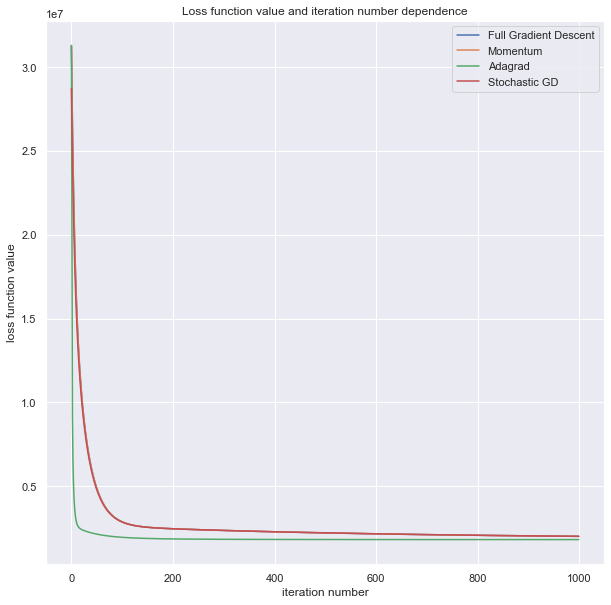

In [159]:
plt.figure(1, figsize=(10,10))
plt.plot(model_full_gr.loss_history)
plt.plot(model_momentum.loss_history)
plt.plot(model_adagrad.loss_history)
plt.plot(model_stochastic.loss_history)
plt.legend(["Full Gradient Descent", "Momentum", "Adagrad", "Stochastic GD"])
plt.xlabel("iteration number")
plt.ylabel("loss function value")
plt.title("Loss function value and iteration number dependence")

***Графики накладываются друг на друга
Значение функции потерь с каждой итерацией уменьшается для всех модификаций градиентного спуска.
Значение резко уменьшается в районе 0-100 итераций.